In [16]:
import numpy as np
import cv2
from  matplotlib import pyplot as plt
import os

In [17]:
# img = cv2.imread('0.jpg')
# img = cv2.imread('1.jpg')
# img = cv2.imread('00.jpg')
# img = cv2.imread('000.jpg')
# img = cv2.imread('11.jpg')
img = cv2.imread('h0.jpg')
# img = cv2.imread('h1.jpg')

In [18]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [19]:
# # 确定合适的参数，使输出len为1

# for param1 in range(10, 250, 10):
#     for param2 in range(10, 100, 10):
#         # circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 200, param1=param1, param2=param2, minRadius=60, maxRadius=100) # 00 and 11
#         circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 200, param1=param1, param2=param2, minRadius=50, maxRadius=60) # h0
#         if circles is not None:
#             print(circles.shape[1], end=' ')
#         else: 
#             print('param1:', param1, 'param2:', param2-10, end=' ')
#             break
#     print()

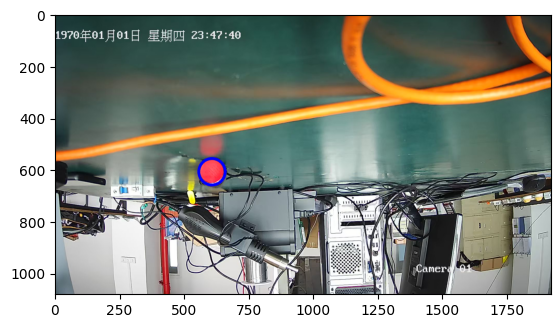

In [20]:
# 使用霍夫变换检测圆形

# circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 200, param1=10, param2=90, minRadius=75, maxRadius=125) # 0 and 1
# circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 200, param1=40, param2=60, minRadius=60, maxRadius=100) # 00 and 000 and 11
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 200, param1=20, param2=40, minRadius=50, maxRadius=60) # h0 and h1

# 如果检测到圆形，则在原图上绘制圆形
img_bgr = img.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    # 绘制圆轮廓
    for i in circles[0, :]:
        cv2.circle(img_bgr, (i[0], i[1]), i[2], (255, 0, 0), 10)

# 使用matplotlib显示结果图像
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
if circles[0] is not None:
    for i in circles[0]:
        # 创建一个与原图相同大小的全零（黑色）掩码
        mask = np.zeros_like(img_gray)
        # 在掩码上绘制一个白色的填充圆，仅包含当前圆形内的像素
        cv2.circle(mask, (i[0], i[1]), i[2], (255, 255, 255), thickness=-1)
        
        # 使用掩码获取圆形内的像素
        circle_pixels = cv2.bitwise_and(img_gray, img_gray, mask=mask)
        
        # 计算圆形内非零像素的平均灰度值
        mean_val = np.mean(circle_pixels[circle_pixels > 0])
        print(f"圆心({i[0]}, {i[1]})，半径{i[2]}的圆形内像素的灰度值平均数为：{mean_val}")

圆心(606, 608)，半径51的圆形内像素的灰度值平均数为：123.01553896977853


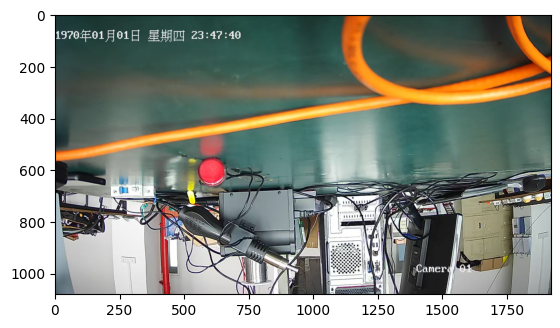

0


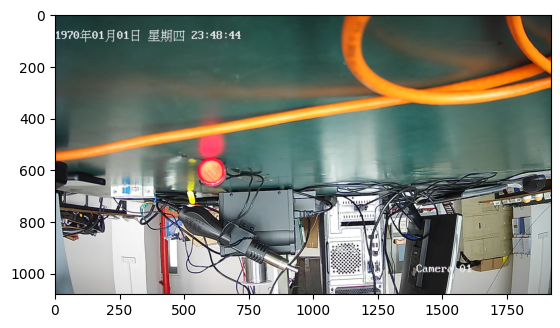

1


In [23]:
def is_light_up(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 200, param1=10, param2=90, minRadius=75, maxRadius=125) # 0 and 1
    # circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 200, param1=40, param2=70, minRadius=60, maxRadius=100) # 00 and 11
    circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 200, param1=20, param2=40, minRadius=50, maxRadius=60) # h0 and h1

    if len(circles[0]) == 1:
        circles = np.uint16(np.around(circles))
        i = circles[0][0]
        mask = np.zeros_like(img_gray)
        cv2.circle(mask, (i[0], i[1]), i[2], (255, 255, 255), thickness=-1)
        circle_pixels = cv2.bitwise_and(img_gray, img_gray, mask=mask)
        mean_val = np.mean(circle_pixels[circle_pixels > 0])
        return int(mean_val > 150)
    return 'ERROR'

# print(is_light_up(cv2.imread('0.jpg')))
# print(is_light_up(cv2.imread('1.jpg')))
# print(is_light_up(cv2.imread('00.jpg')))
# print(is_light_up(cv2.imread('11.jpg')))
print(is_light_up(cv2.imread('h0.jpg')))
print(is_light_up(cv2.imread('h1.jpg')))